In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

100%|██████████| 1.55k/1.55k [00:00<00:00, 1.91MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
Found CSV file: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null 

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


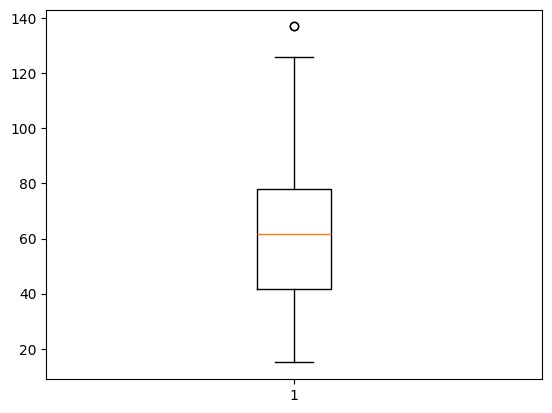

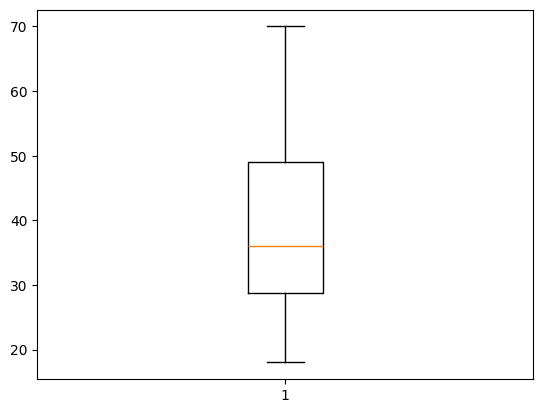

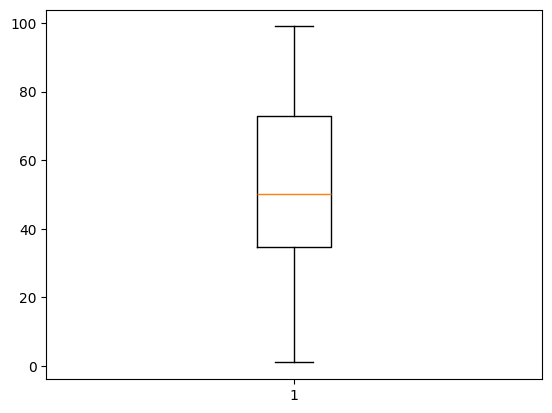

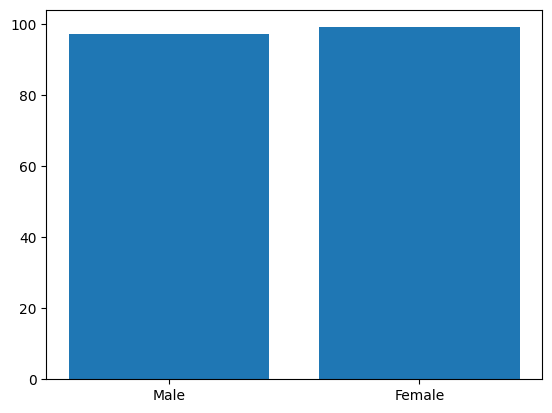

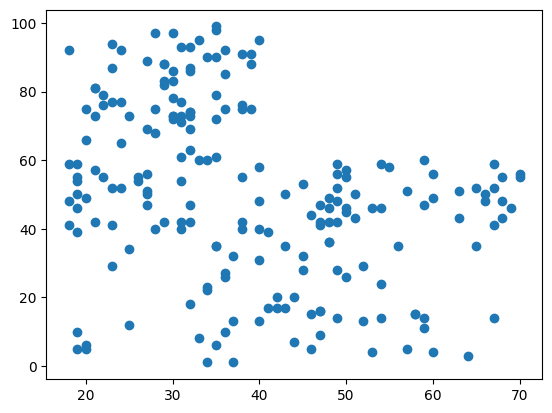

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(df['Annual Income (k$)'])
plt.show()
plt.boxplot(df['Age'])
plt.show()
plt.boxplot(df['Spending Score (1-100)'])
plt.show()
plt.bar(df['Gender'], df['Spending Score (1-100)'])
plt.show()
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.show()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64
CustomerID                3350.000000
Gender                       0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64


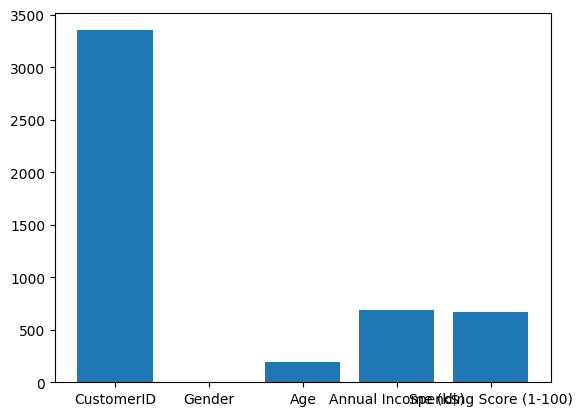

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(df['Gender'].head())
# male is encoded with 1
# female is encoded with 0

variace = df.var()
print(variace)
plt.bar(df.columns, variace)
plt.show()
print(df.columns)

   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008197                0.051020
3     0.0  0.096154            0.008197                0.775510
4     0.0  0.250000            0.016393                0.397959
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008197                0.051020
3     0.0  0.096154            0.008197                0.775510
4     0.0  0.250000            0.016393                0.397959
Variance of normalized features:
 Gender                    0.247638
Age                       0.072165
Annual Income (k$)        0.046347
Spending Score (1-100)    0.069435
dtype: float64


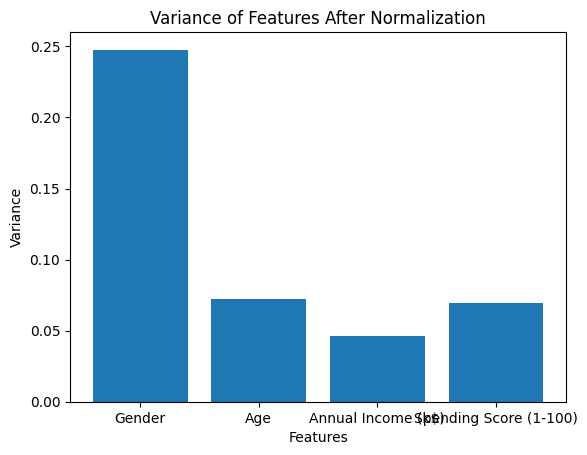

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Initialize MinMaxScaler to normalize data between 0 and 1
scaler = MinMaxScaler()
columns_to_scale = df.columns.drop('CustomerID')
# Fit and transform the data
df_scaled = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)
print(df_scaled.head())

# Display the first few rows of the normalized data
print(df_scaled.head())

# Calculate the variance of each normalized feature (values will be small since data is between 0 and 1)
variance = df_scaled.var()
print("Variance of normalized features:\n", variance)

# Plot the variance of each feature after normalization
plt.bar(df_scaled.columns, variance)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features After Normalization")
plt.show()


Number of components to retain 95% variance: 4
        PC1       PC2       PC3       PC4
0  0.532955 -0.227841 -0.321860 -0.415081
1  0.513939 -0.493080  0.016202 -0.402672
2 -0.446266  0.087079 -0.555761 -0.382392
3 -0.478796 -0.366617  0.010714 -0.361842
4 -0.451984  0.003006 -0.159208 -0.353639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     200 non-null    float64
 1   PC2     200 non-null    float64
 2   PC3     200 non-null    float64
 3   PC4     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
PCA Loadings (Feature Contribution to Principal Components):
                             PC1       PC2       PC3       PC4
Gender                  0.996990 -0.070875  0.001626 -0.031376
Age                     0.052295  0.725476  0.683770  0.058376
Annual Income (k$)      0.029466 -0.028423 -0.057259  0.997520
Spending Score (1

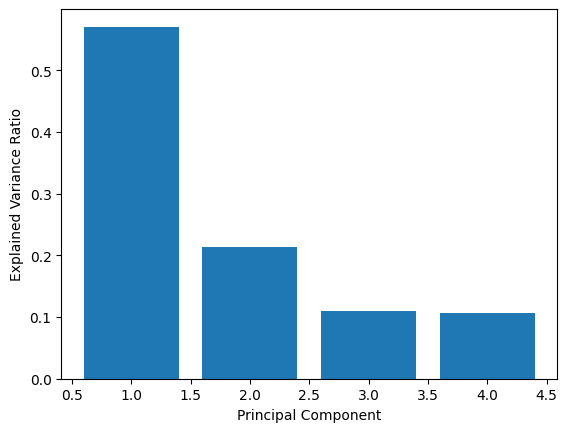

Cummulative Variance: [0.57076896 0.78481838 0.89409936 1.        ]


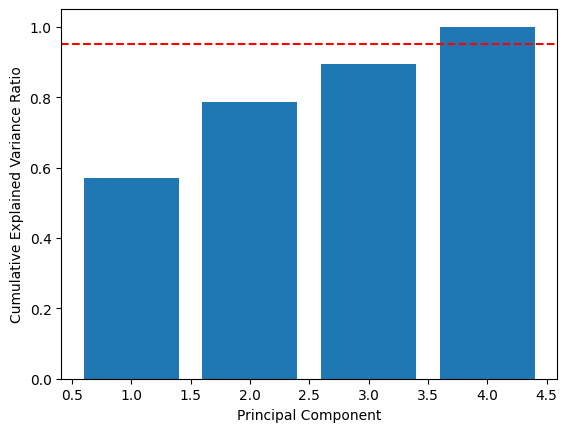

In [ ]:

from sklearn.decomposition import PCA
import numpy as np

# Create a PCA instance that retains 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the data
df_pca = pca.fit_transform(df_scaled)
# Check the number of components chosen to retain 95% variance
n_components = pca.n_components_
print(f'Number of components to retain 95% variance: {n_components}')

# Convert the transformed data into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Print the first few rows of the PCA DataFrame
print(df_pca.head())
print(df_pca.info())
# Create a DataFrame to show PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=df[columns_to_scale].columns)

print("PCA Loadings (Feature Contribution to Principal Components):")
print(loadings)


explained_variance = pca.explained_variance_ratio_
print("Explained Variance:",explained_variance)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
cummulative_variance = np.cumsum(explained_variance)
print("Cummulative Variance:",cummulative_variance)
plt.bar(range(1, len(cummulative_variance) + 1), cummulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


[86.68148216035951, 37.27227241211878, 30.11037481210345, 22.390960011928545, 19.062840919692896, 16.908072612005718, 14.868935293378037, 13.755898225206506, 12.840512868962904, 12.209239061265675]


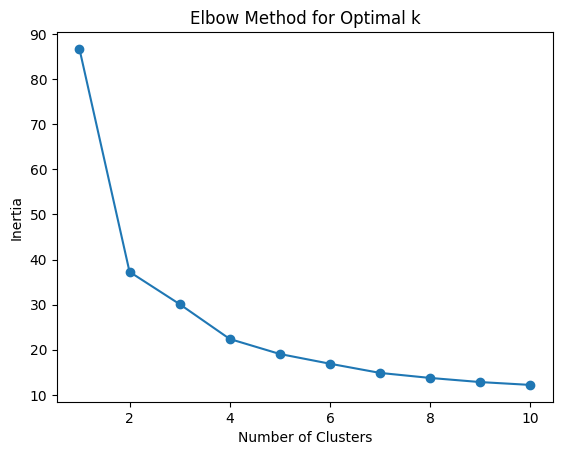

        PC1       PC2       PC3       PC4
0  0.532955 -0.227841 -0.321860 -0.415081
1  0.513939 -0.493080  0.016202 -0.402672
2 -0.446266  0.087079 -0.555761 -0.382392
3 -0.478796 -0.366617  0.010714 -0.361842
4 -0.451984  0.003006 -0.159208 -0.353639


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Determine the optimal number of clusters with the Elbow Method (optional)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
print(inertia)

# Plot the Elbow graph to find the optimal number of clusters
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
print(df_pca.head())

        PC1       PC2       PC3       PC4  Cluster
0  0.532955 -0.227841 -0.321860 -0.415081        3
1  0.513939 -0.493080  0.016202 -0.402672        3
2 -0.446266  0.087079 -0.555761 -0.382392        1
3 -0.478796 -0.366617  0.010714 -0.361842        2
4 -0.451984  0.003006 -0.159208 -0.353639        2


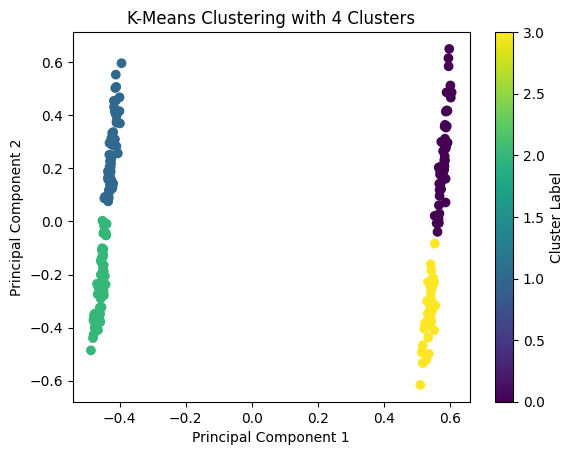

       CustomerID  Gender        Age  Annual Income (k$)  \
count   48.000000    48.0  48.000000           48.000000   
mean   104.958333     1.0  49.437500           62.416667   
std     54.647792     0.0  14.028703           24.696311   
min      9.000000     1.0  19.000000           19.000000   
25%     60.750000     1.0  40.000000           46.000000   
50%    106.500000     1.0  48.500000           62.500000   
75%    152.500000     1.0  59.250000           78.000000   
max    199.000000     1.0  70.000000          137.000000   

       Spending Score (1-100)  Cluster  
count               48.000000     48.0  
mean                29.208333      0.0  
std                 19.266284      0.0  
min                  1.000000      0.0  
25%                 11.750000      0.0  
50%                 32.000000      0.0  
75%                 46.250000      0.0  
max                 60.000000      0.0  
       CustomerID  Gender        Age  Annual Income (k$)  \
count   55.000000    55.0  55.

In [ ]:
# Based on the elbow plot, choose an optimal k (e.g., 3 in this example)
optimal_k = 4# Replace with your chosen k after observing the elbow plot

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

# Add cluster labels to the PCA-reduced DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
df_pca['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_
print(df_pca.head())
# Visualize the clusters if PCA has reduced to 2D or 3D for easy plotting
if df_pca.shape[1] >= 2:  # For 2D plotting
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clustering with {optimal_k} Clusters')
    plt.colorbar(label='Cluster Label')
    plt.show()
# Split the DataFrame into separate DataFrames by cluster
cluster_0_df = df[df['Cluster'] == 0]
cluster_1_df = df[df['Cluster'] == 1]
cluster_2_df = df[df['Cluster'] == 2]
cluster_3_df = df[df['Cluster'] == 3]

print(cluster_0_df.describe())
print(cluster_1_df.describe())
print(cluster_2_df.describe())
print(cluster_3_df.describe())


        PC1       PC2       PC3       PC4  Cluster
0  0.532955 -0.227841 -0.321860 -0.415081        2
1  0.513939 -0.493080  0.016202 -0.402672        2
2 -0.446266  0.087079 -0.555761 -0.382392        1
3 -0.478796 -0.366617  0.010714 -0.361842        1
4 -0.451984  0.003006 -0.159208 -0.353639        1


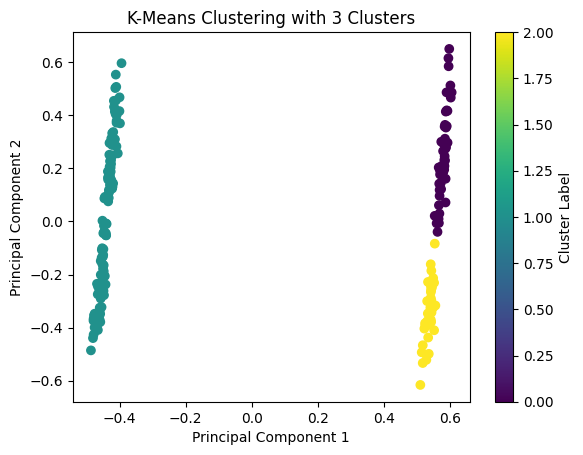

       CustomerID  Gender        Age  Annual Income (k$)  \
count   48.000000    48.0  48.000000           48.000000   
mean   104.958333     1.0  49.437500           62.416667   
std     54.647792     0.0  14.028703           24.696311   
min      9.000000     1.0  19.000000           19.000000   
25%     60.750000     1.0  40.000000           46.000000   
50%    106.500000     1.0  48.500000           62.500000   
75%    152.500000     1.0  59.250000           78.000000   
max    199.000000     1.0  70.000000          137.000000   

       Spending Score (1-100)  Cluster  
count               48.000000     48.0  
mean                29.208333      0.0  
std                 19.266284      0.0  
min                  1.000000      0.0  
25%                 11.750000      0.0  
50%                 32.000000      0.0  
75%                 46.250000      0.0  
max                 60.000000      0.0  
       CustomerID  Gender         Age  Annual Income (k$)  \
count  112.000000   112.0  11

In [ ]:
# Based on the elbow plot, choose an optimal k (e.g., 3 in this example)
optimal_k = 3# Replace with your chosen k after observing the elbow plot

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

# Add cluster labels to the PCA-reduced DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
df_pca['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_
print(df_pca.head())
# Visualize the clusters if PCA has reduced to 2D or 3D for easy plotting
if df_pca.shape[1] >= 2:  # For 2D plotting
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clustering with {optimal_k} Clusters')
    plt.colorbar(label='Cluster Label')
    plt.show()
# Split the DataFrame into separate DataFrames by cluster
cluster_0_df = df[df['Cluster'] == 0]
cluster_1_df = df[df['Cluster'] == 1]
cluster_2_df = df[df['Cluster'] == 2]


print(cluster_0_df.describe())
print(cluster_1_df.describe())
print(cluster_2_df.describe())



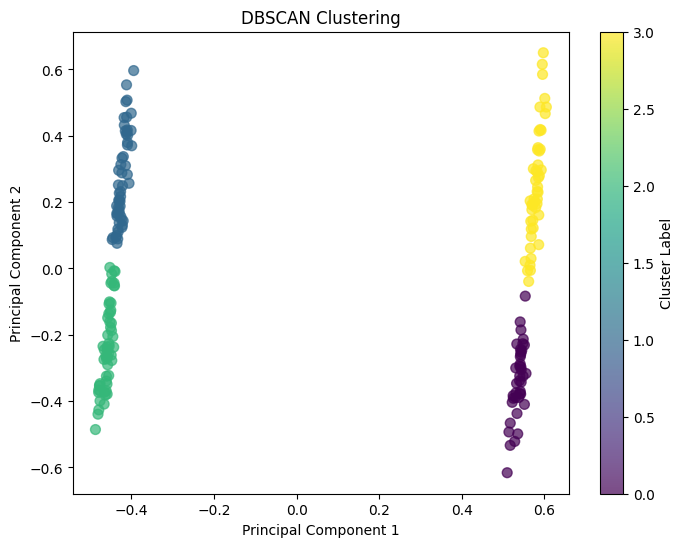

Cluster labels:
 Cluster
2    57
1    55
3    48
0    40
Name: count, dtype: int64
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    40.0  40.000000           40.000000               40.000000     40.0
mean      1.0  28.250000           62.000000               71.675000      0.0
std       0.0   6.975231           29.117798               16.727664      0.0
min       1.0  18.000000           15.000000               39.000000      0.0
25%       1.0  21.750000           41.000000               58.250000      0.0
50%       1.0  28.000000           63.000000               73.000000      0.0
75%       1.0  33.250000           78.000000               88.500000      0.0
max       1.0  40.000000          137.000000               97.000000      0.0
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    55.0  55.000000           55.000000               55.000000     55.0
mean      0.0  48.109091           58.818182               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

df_new=df.drop('CustomerID',axis=1)
# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_pca)

# Step 4: Add cluster labels to the DataFrame
df_pca['Cluster'] = dbscan_labels
df_new['Cluster'] = dbscan_labels

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

# Print the cluster labels
print("Cluster labels:\n", df_pca['Cluster'].value_counts())

cluster_0_df = df_new[df_new['Cluster'] == 0]
cluster_1_df = df_new[df_new['Cluster'] == 1]
cluster_2_df = df_new[df_new['Cluster'] == 2]
cluster_3_df = df_new[df_new['Cluster'] == 3]

print(cluster_0_df.describe())
print(cluster_1_df.describe())
print(cluster_2_df.describe())
print(cluster_3_df.describe())
